In [4]:
import pandas as pd
import numpy as np

In [5]:
df= pd.read_csv('train 2.csv',parse_dates=['date'])
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


no missing values observed in the dataset.

In [7]:
df.drop('store',axis=1,inplace=True)#dropping store col as as our problem statement focused on item demand but not on stores.

In [8]:
d1=df.groupby(['item','date'])['sales'].sum()#Grouping data based on item and date to get total sales of item on each day.

In [9]:
type(d1)

pandas.core.series.Series

In [10]:
d2=d1.to_frame()#changing to dataframe

In [11]:
type(d2)

pandas.core.frame.DataFrame

In [12]:
d2

sales
item date             
1    2013-01-01    133
     2013-01-02     99
     2013-01-03    127
     2013-01-04    145
     2013-01-05    149
...                ...
50   2017-12-27    511
     2017-12-28    587
     2017-12-29    596
     2017-12-30    612
     2017-12-31    626

[91300 rows x 1 columns]

In [13]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 91300 entries, (1, Timestamp('2013-01-01 00:00:00')) to (50, Timestamp('2017-12-31 00:00:00'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   91300 non-null  int64
dtypes: int64(1)
memory usage: 995.5 KB


In [14]:
d2.reset_index(inplace=True)
d2.set_index('date',inplace=True)#making only date as index

In [15]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91300 entries, 2013-01-01 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    91300 non-null  int64
 1   sales   91300 non-null  int64
dtypes: int64(2)
memory usage: 2.1 MB


<AxesSubplot:xlabel='date'>

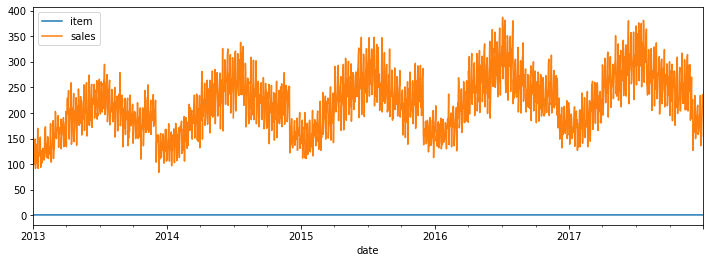

In [16]:
d2[d2['item']==1].plot(figsize=(12,4))#plotting item1 sales

In [17]:
df_item1=d2[d2['item']==1]
df_item1['90day_sales']=df_item1['sales'].rolling(90).sum()
df_item1=df_item1.shift(-89)
df_item1=df_item1.iloc[::7]
df_item1.drop(['item','sales'],axis=1,inplace=True)
df_item1# it gives information about next 90days sales data of item1.

<ipython-input-17-77e90895a78d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item1['90day_sales']=df_item1['sales'].rolling(90).sum()


,90day_sales
date,
2013-01-01,12847.0
2013-01-08,13375.0
2013-01-15,13891.0
2013-01-22,14356.0
2013-01-29,14866.0
...,...
2017-11-28,NaN
2017-12-05,NaN
2017-12-12,NaN


<AxesSubplot:xlabel='date'>

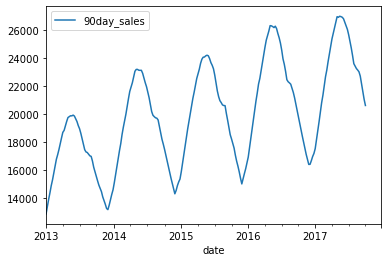

In [18]:
df_item1.plot()

In [19]:
df_item1.reset_index(inplace=True)

In [20]:
df_item1['day']=df_item1['date'].dt.day
df_item1['week']=df_item1['date'].dt.week
df_item1['year']=df_item1['date'].dt.year

<ipython-input-20-4a59c30d0b5c>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_item1['week']=df_item1['date'].dt.week


In [21]:
df_item1.dropna(inplace=True)

In [22]:
df_item1.set_index('date',inplace=True)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
X_train=df_item1.drop(['90day_sales'],axis=1).iloc[:200]
X_test=df_item1.drop(['90day_sales'],axis=1).iloc[200:]

In [26]:
Y_train=df_item1['90day_sales'].iloc[:200]
Y_test=df_item1['90day_sales'].iloc[200:]

In [27]:
X_test

,day,week,year
date,,,
2016-11-01,1,44,2016
2016-11-08,8,45,2016
2016-11-15,15,46,2016
2016-11-22,22,47,2016
2016-11-29,29,48,2016
2016-12-06,6,49,2016
2016-12-13,13,50,2016
2016-12-20,20,51,2016
2016-12-27,27,52,2016


In [28]:
lr.fit(X_train,Y_train)

LinearRegression()

<AxesSubplot:title={'center':'LinearRegression'}, xlabel='date', ylabel='sales'>

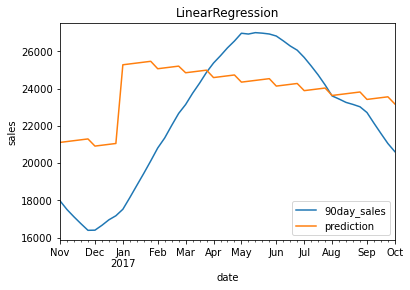

In [29]:
pred=lr.predict(X_test)
yt=Y_test.to_frame()
yt['prediction']=pred
yt.plot(ylabel='sales',title='LinearRegression')

In [30]:
from sklearn.metrics import r2_score

In [31]:
print(r2_score(Y_test,pred))

0.15886231040197052


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf=RandomForestRegressor()

In [34]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

<AxesSubplot:title={'center':'RandomForest'}, xlabel='date', ylabel='sales'>

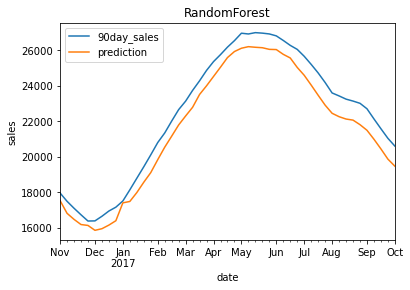

In [35]:
pred=rf.predict(X_test)
yt=Y_test.to_frame()
yt['prediction']=pred
yt.plot(ylabel='sales',title='RandomForest')

In [36]:
print(r2_score(Y_test,pred))

0.9356464154128797


In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dt=DecisionTreeRegressor()

In [39]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

<AxesSubplot:title={'center':'DecisionTree'}, xlabel='date', ylabel='sales'>

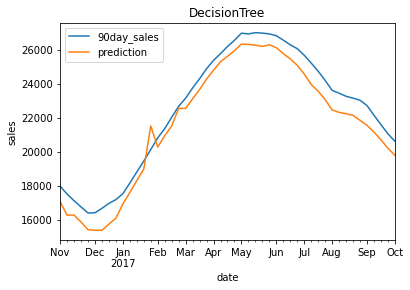

In [40]:
pred=dt.predict(X_test)
yt=Y_test.to_frame()
yt['prediction']=pred
yt.plot(ylabel='sales',title='DecisionTree')

In [41]:
print(r2_score(Y_test,pred))

0.9373898917049719


In [42]:
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [43]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'XGBoost'}, xlabel='date', ylabel='sales'>

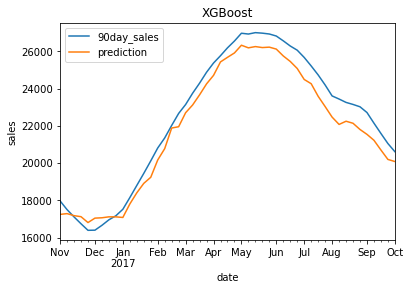

In [44]:
pred=xgb.predict(X_test)
yt=Y_test.to_frame()
yt['prediction']=pred
yt.plot(ylabel='sales',title='XGBoost')

In [45]:
print(r2_score(Y_test,pred))

0.9540473207748267


In [46]:
from datetime import datetime

In [51]:
p=[2018,1,4]
p=np.array(p).reshape((1,-1))
print('The predicted next 90day sales are ',xgb.predict(p))

The predicted next 90day sales are  [14572.312]


In [16]:
import warnings
warnings.filterwarnings('ignore')

### Let us plot 90day sales of all the items.

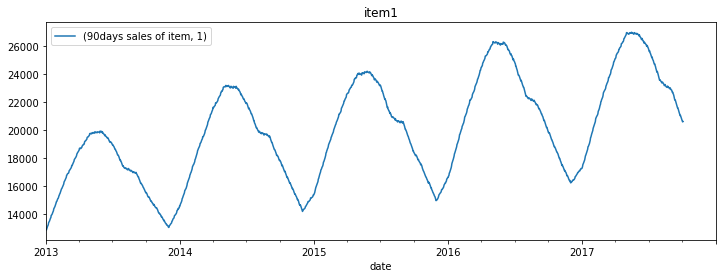

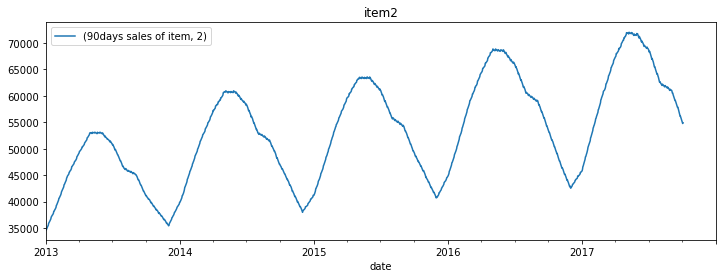

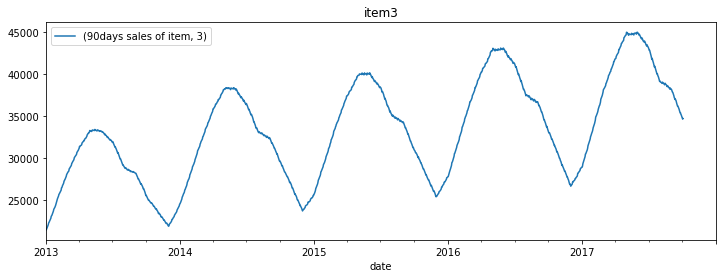

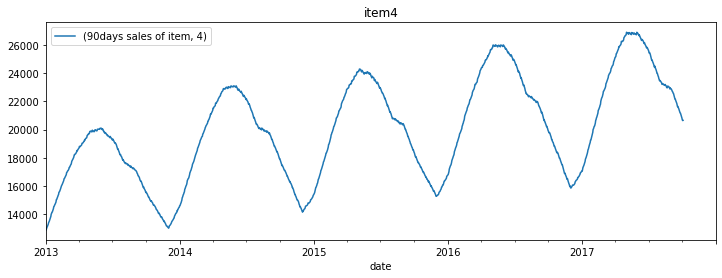

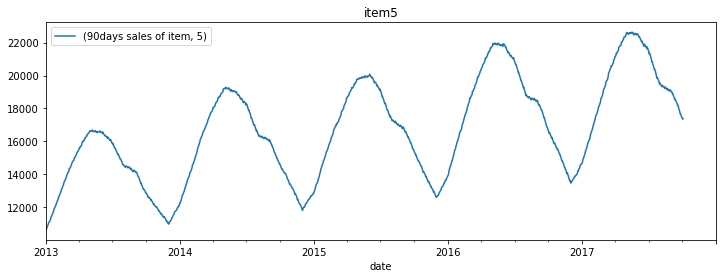

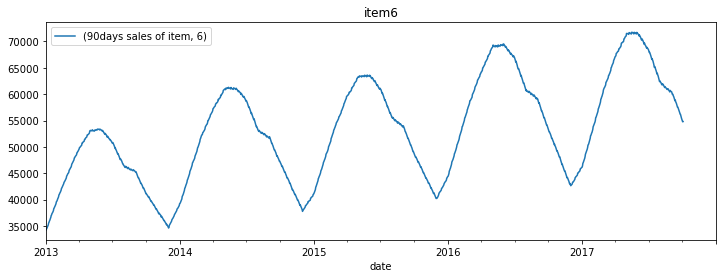

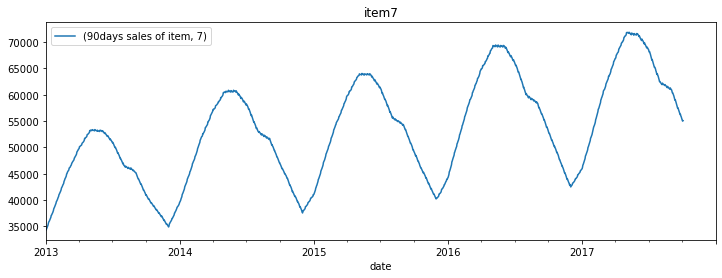

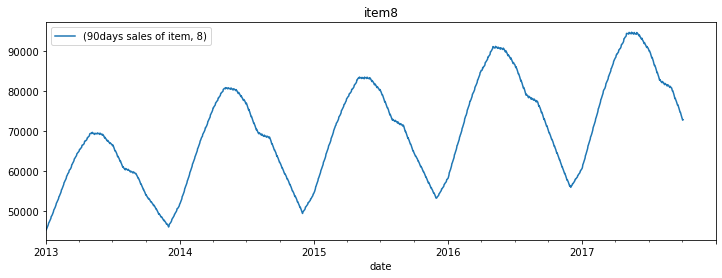

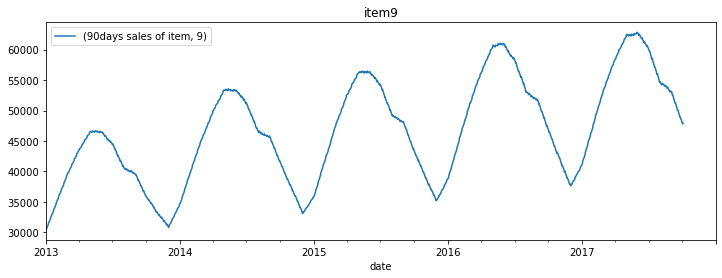

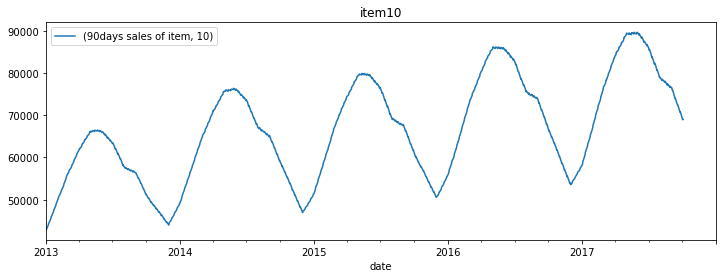

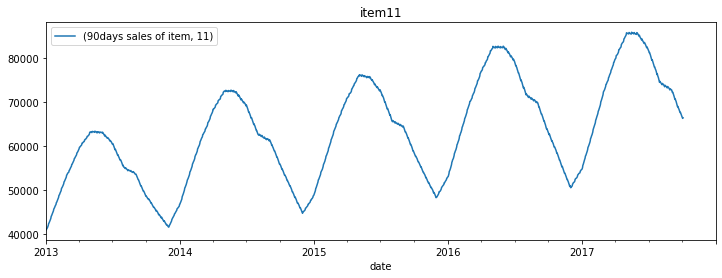

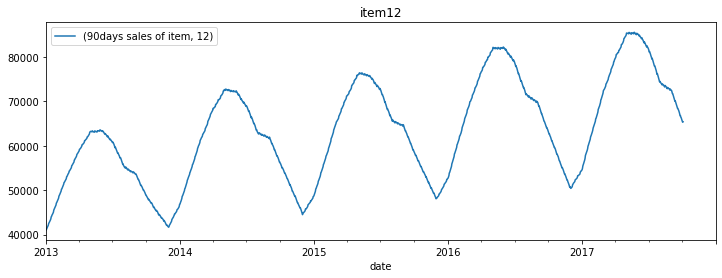

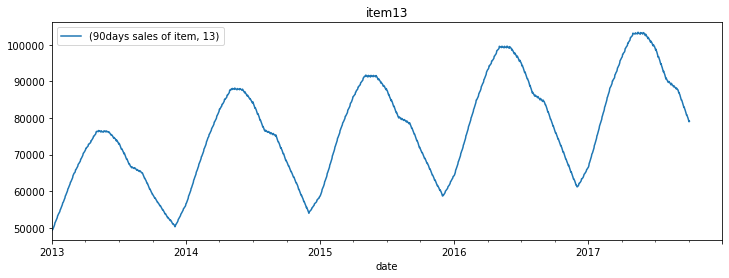

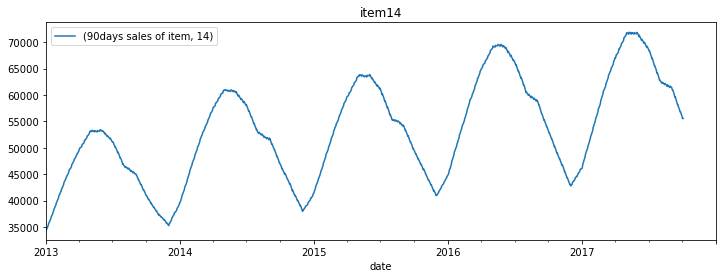

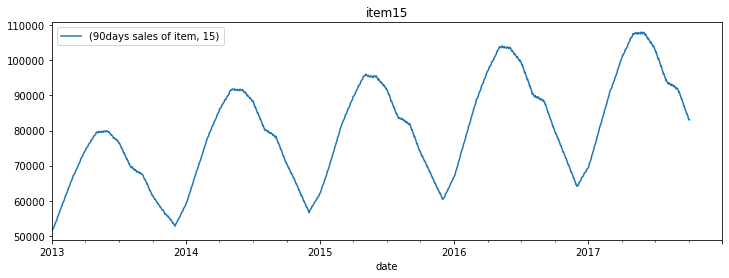

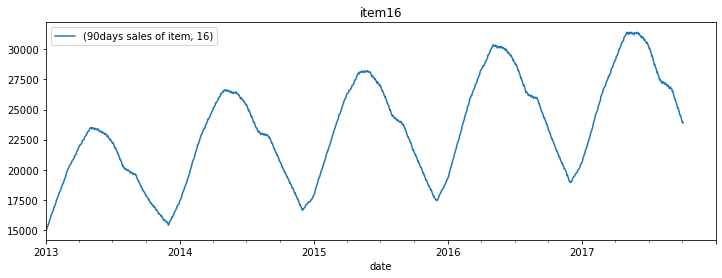

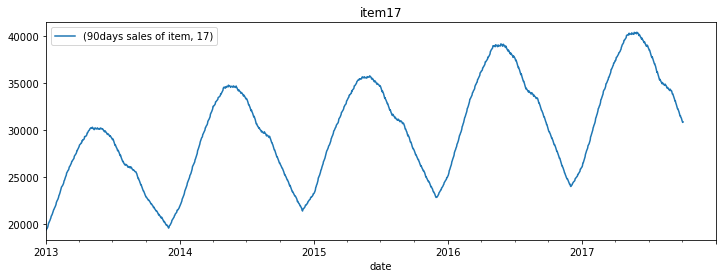

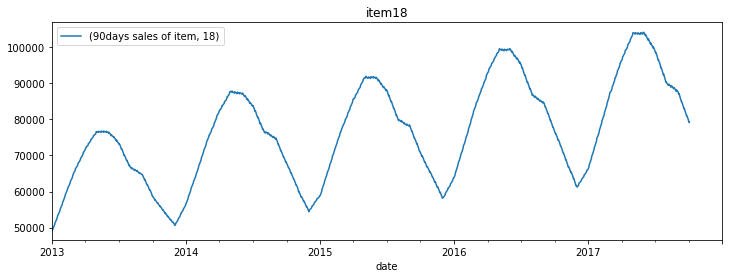

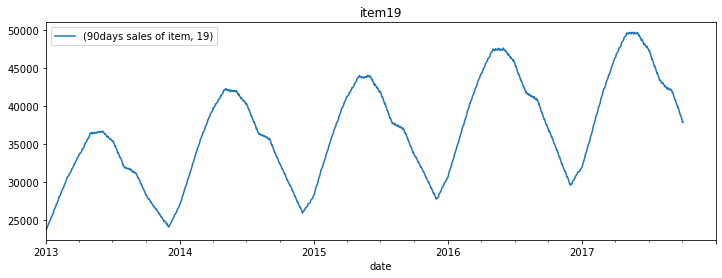

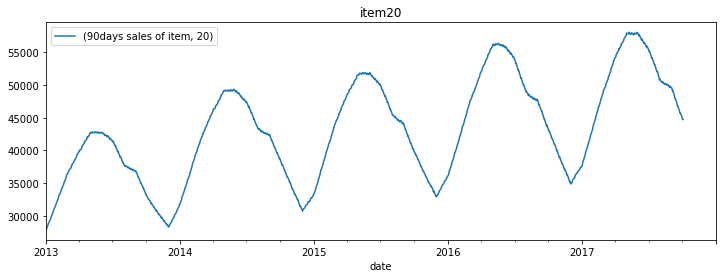

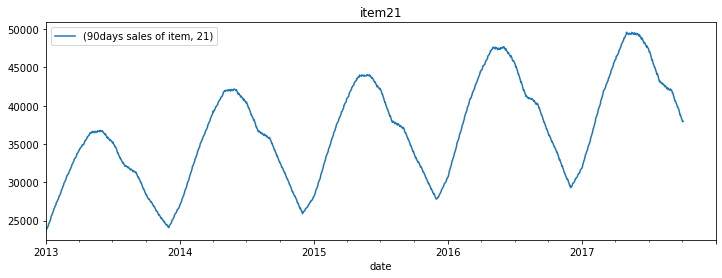

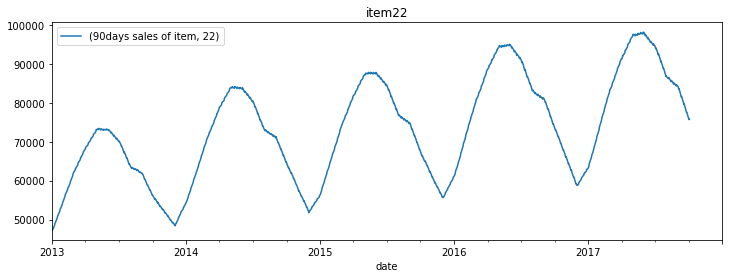

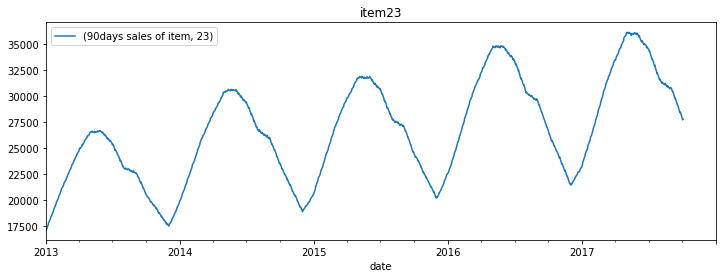

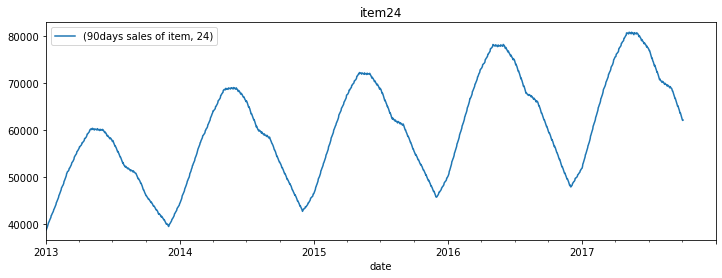

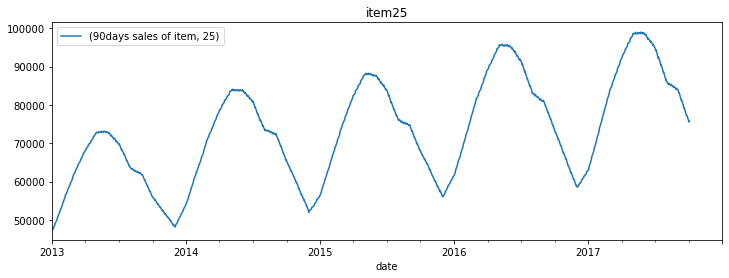

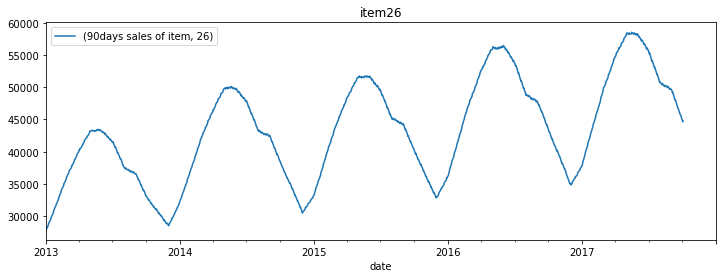

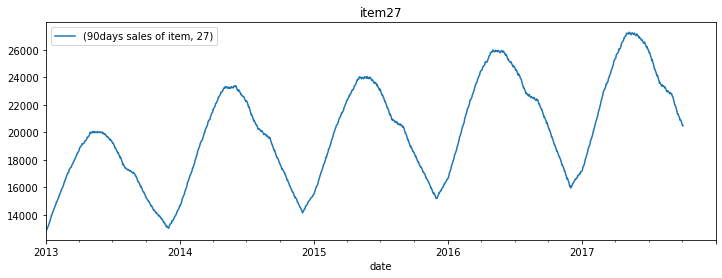

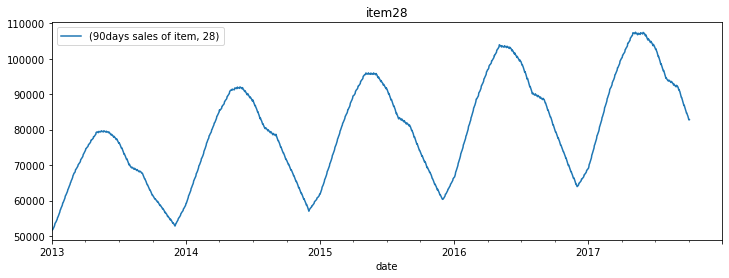

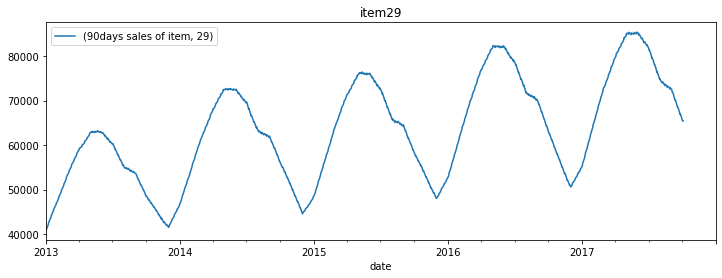

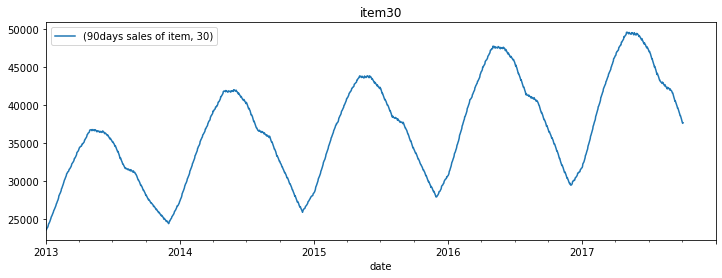

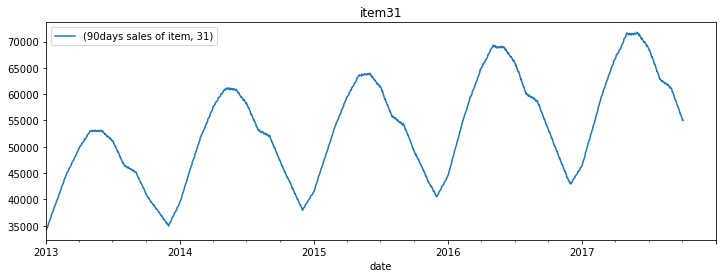

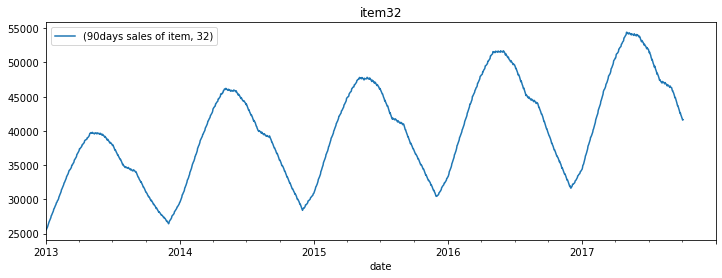

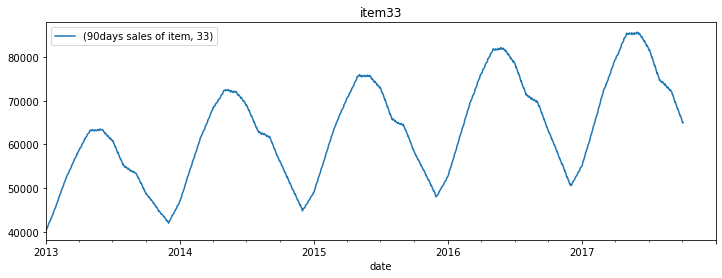

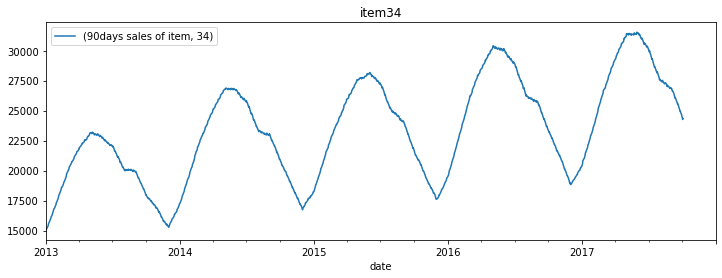

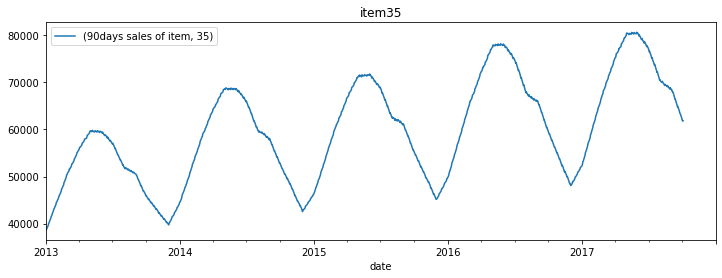

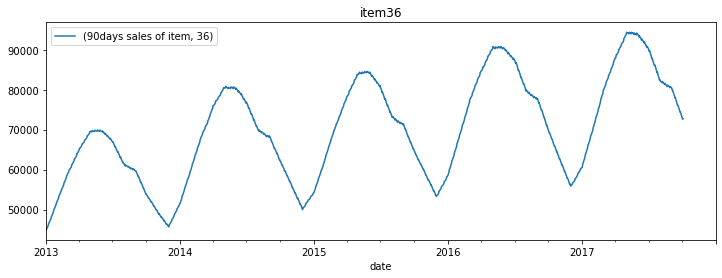

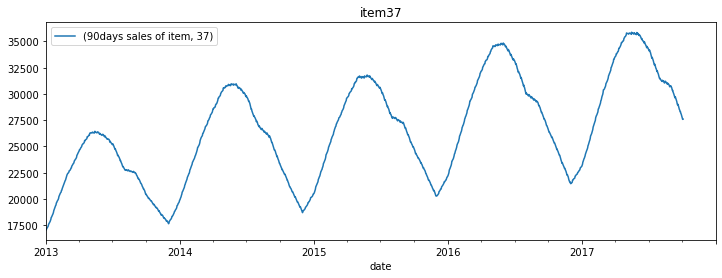

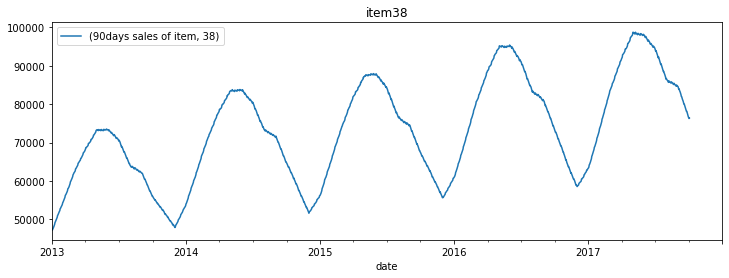

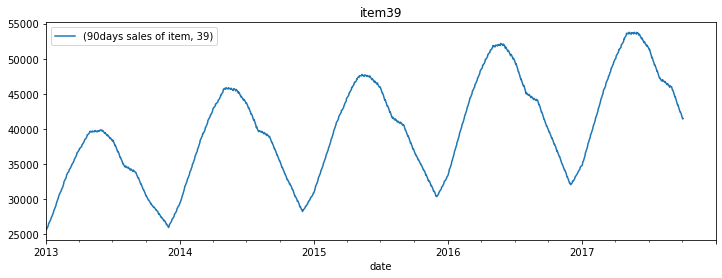

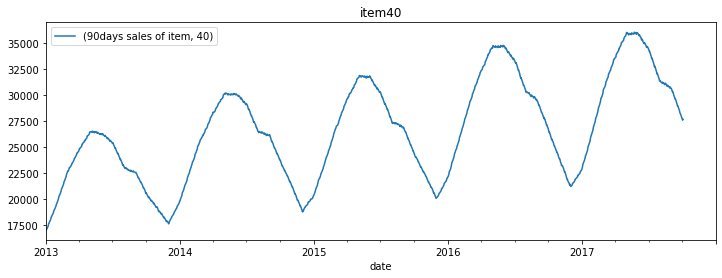

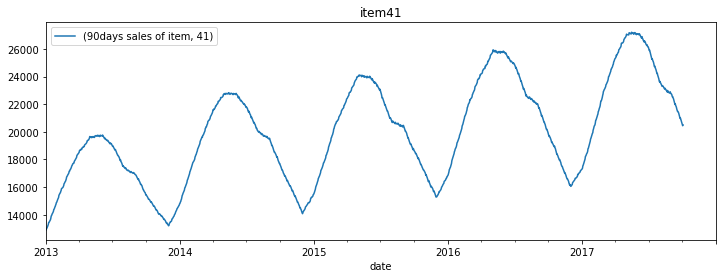

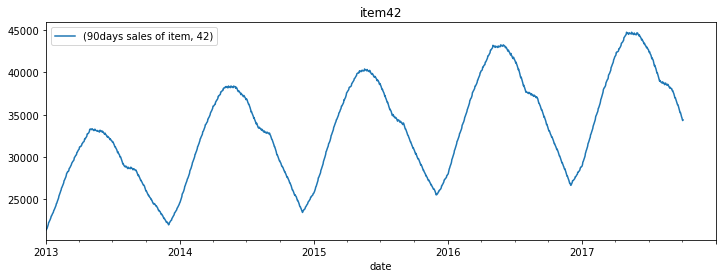

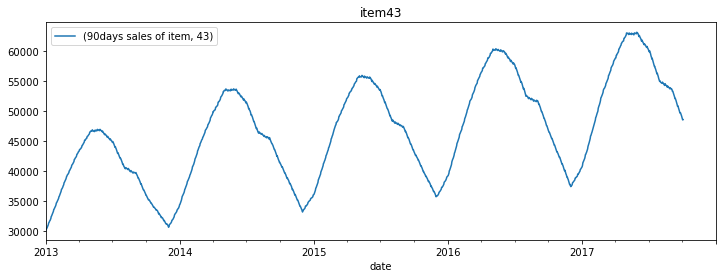

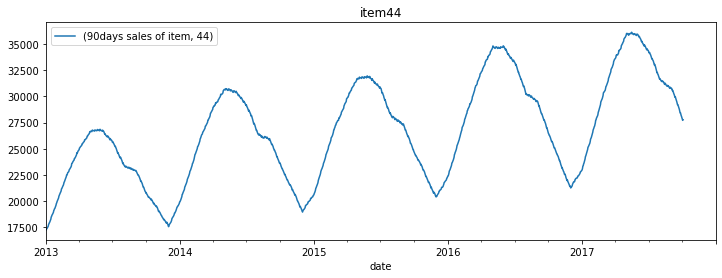

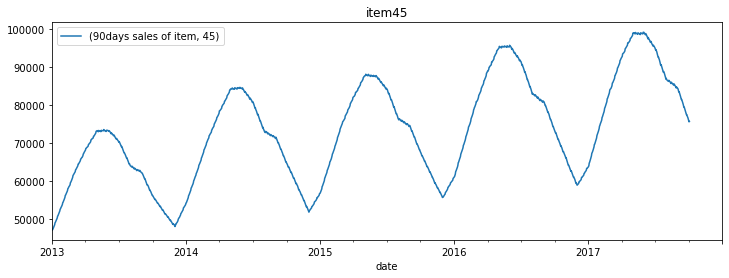

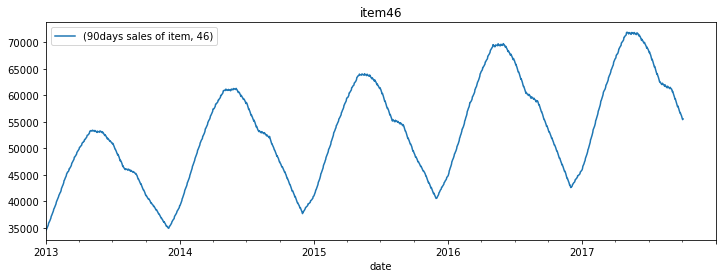

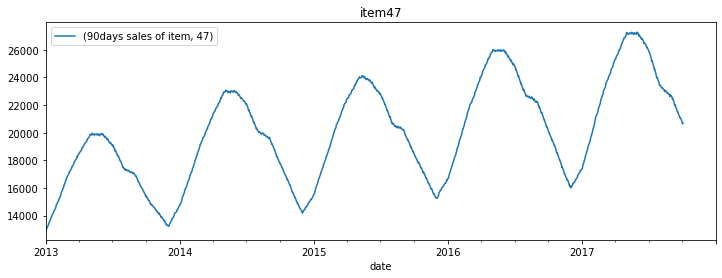

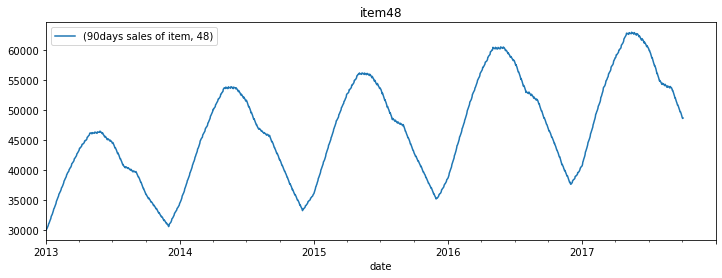

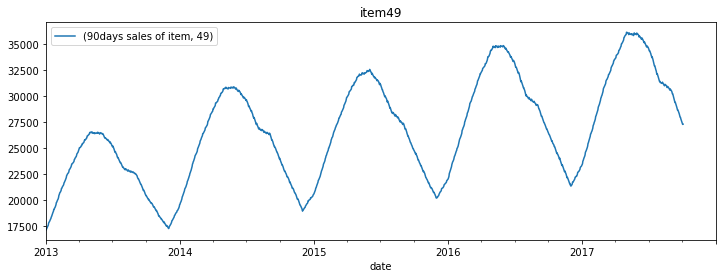

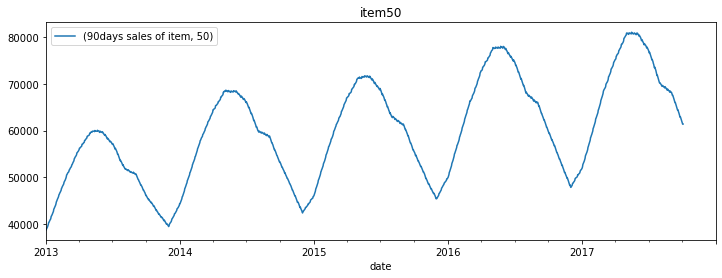

In [17]:
for i in range(1,51):
    item=d2[d2['item']==i]
    item['90days sales of item',i]=item['sales'].rolling(90).sum().shift(-89)
    item.drop(['item','sales'],axis=1,inplace=True)
    item.plot(figsize=(12,4),title='item'+str(i))

In [27]:
di1=df_item1.copy()

In [28]:
di1['lag1']=di1['90day_sales'].shift(1)
di1['lag2']=di1['90day_sales'].shift(2)
di1['lag3']=di1['90day_sales'].shift(3)
di1['lag4']=di1['90day_sales'].shift(4)
di1['lag5']=di1['90day_sales'].shift(5)
di1['lag6']=di1['90day_sales'].shift(6)

In [29]:
di1=di1.dropna()
di1

,90day_sales,lag1,lag2,lag3,lag4,lag5,lag6
date,,,,,,,
2013-01-07,13223.0,13153.0,13103.0,13019.0,12936.0,12848.0,12847.0
2013-01-08,13375.0,13223.0,13153.0,13103.0,13019.0,12936.0,12848.0
2013-01-09,13423.0,13375.0,13223.0,13153.0,13103.0,13019.0,12936.0
2013-01-10,13458.0,13423.0,13375.0,13223.0,13153.0,13103.0,13019.0
2013-01-11,13538.0,13458.0,13423.0,13375.0,13223.0,13153.0,13103.0
...,...,...,...,...,...,...,...
2017-09-29,20796.0,20877.0,20961.0,21047.0,21027.0,21133.0,21208.0
2017-09-30,20704.0,20796.0,20877.0,20961.0,21047.0,21027.0,21133.0
2017-10-01,20642.0,20704.0,20796.0,20877.0,20961.0,21047.0,21027.0


In [20]:
from sklearn.linear_model import LinearRegression

In [30]:
x1,x2,x3,x4,x5,x6,y=di1['lag1'],di1['lag2'],di1['lag3'],di1['lag4'],di1['lag5'],di1['lag6'],di1['90day_sales']

In [31]:
x1,x2,x3,x4,x5,x6,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(y)
x1,x2,x3,x4,x5,x6,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6),axis=1)

In [32]:
final_x

array([[13153., 13103., 13019., 12936., 12848., 12847.],
       [13223., 13153., 13103., 13019., 12936., 12848.],
       [13375., 13223., 13153., 13103., 13019., 12936.],
       ...,
       [20704., 20796., 20877., 20961., 21047., 21027.],
       [20642., 20704., 20796., 20877., 20961., 21047.],
       [20578., 20642., 20704., 20796., 20877., 20961.]])

In [33]:
X_train,X_test,Y_train,Y_test=final_x[:-300],final_x[-300:],y[:-300],y[-300:]

In [34]:
lr=LinearRegression()

In [35]:
lr.fit(X_train,Y_train)

LinearRegression()

In [36]:
pred=lr.predict(X_test)

In [37]:
import matplotlib.pyplot as plt

In [38]:
p=di1.index[-300:]
p

DatetimeIndex(['2016-12-08', '2016-12-09', '2016-12-10', '2016-12-11',
               '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15',
               '2016-12-16', '2016-12-17',
               ...
               '2017-09-24', '2017-09-25', '2017-09-26', '2017-09-27',
               '2017-09-28', '2017-09-29', '2017-09-30', '2017-10-01',
               '2017-10-02', '2017-10-03'],
              dtype='datetime64[ns]', name='date', length=300, freq=None)

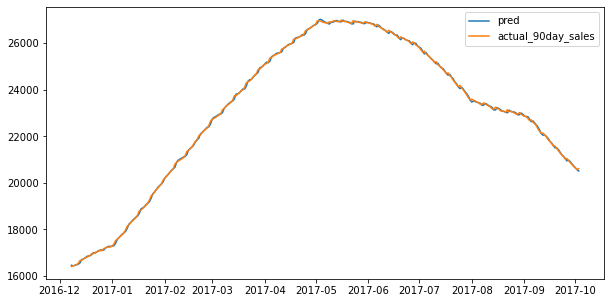

In [39]:
plt.rcParams['figure.figsize']=(10,5)
plt.plot(p,pred,label='pred')
plt.plot(p,Y_test,label='actual_90day_sales')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
print('mse is',mean_squared_error(Y_test,pred))
print('the r2_score of item1 prediction is',r2_score(Y_test,pred))

mse is 2657.2966931920955
the r2_score of item1 prediction is 0.9997265213462189


In [43]:
pred_all=lr.predict(final_x)

In [44]:
pred_all

array([[13212.17153538],
       [13294.08009369],
       [13452.98155453],
       ...,
       [20651.65233067],
       [20566.43983835],
       [20509.51359827]])

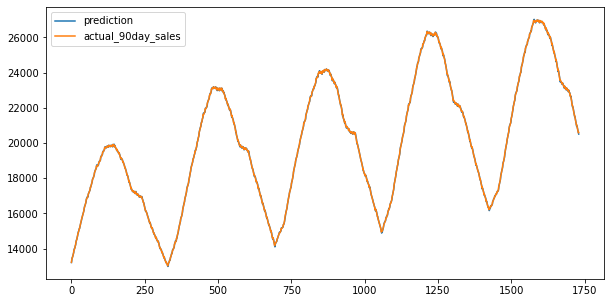

In [45]:
plt.rcParams['figure.figsize']=(10,5)
plt.plot(pred_all,label='prediction')
plt.plot(y,label='actual_90day_sales')
plt.legend()
plt.show()

In [155]:
df_item2=d2[d2['item']==2]
df_item2['90day_sales']=df_item2['sales'].rolling(90).sum()
df_item2=df_item2.shift(-89)
#df_item1=df_item1.iloc[::7]
df_item2.drop(['item','sales'],axis=1,inplace=True)
df_item2# it gives information about next 90days sales data of item1.

,90day_sales
date,
2013-01-01,34650.0
2013-01-02,34724.0
2013-01-03,34917.0
2013-01-04,35113.0
2013-01-05,35248.0
...,...
2017-12-27,NaN
2017-12-28,NaN
2017-12-29,NaN


In [157]:
di2=df_item2.copy()

In [158]:
di2['lag1']=di2['90day_sales'].shift(1)
di2['lag2']=di2['90day_sales'].shift(2)
di2['lag3']=di2['90day_sales'].shift(3)
di2['lag4']=di2['90day_sales'].shift(4)
di2['lag5']=di2['90day_sales'].shift(5)
di2['lag6']=di2['90day_sales'].shift(6)

In [160]:
di2=di2.dropna()
di2

,90day_sales,lag1,lag2,lag3,lag4,lag5,lag6
date,,,,,,,
2013-01-07,35525.0,35399.0,35248.0,35113.0,34917.0,34724.0,34650.0
2013-01-08,35910.0,35525.0,35399.0,35248.0,35113.0,34917.0,34724.0
2013-01-09,36016.0,35910.0,35525.0,35399.0,35248.0,35113.0,34917.0
2013-01-10,36168.0,36016.0,35910.0,35525.0,35399.0,35248.0,35113.0
2013-01-11,36315.0,36168.0,36016.0,35910.0,35525.0,35399.0,35248.0
...,...,...,...,...,...,...,...
2017-09-29,55526.0,55715.0,55936.0,56153.0,56142.0,56451.0,56769.0
2017-09-30,55278.0,55526.0,55715.0,55936.0,56153.0,56142.0,56451.0
2017-10-01,55020.0,55278.0,55526.0,55715.0,55936.0,56153.0,56142.0


In [161]:
x1,x2,x3,x4,x5,x6,y=di2['lag1'],di2['lag2'],di2['lag3'],di2['lag4'],di2['lag5'],di2['lag6'],di2['90day_sales']
x1,x2,x3,x4,x5,x6,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(y)
x1,x2,x3,x4,x5,x6,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6),axis=1)
final_x

array([[35399., 35248., 35113., 34917., 34724., 34650.],
       [35525., 35399., 35248., 35113., 34917., 34724.],
       [35910., 35525., 35399., 35248., 35113., 34917.],
       ...,
       [55278., 55526., 55715., 55936., 56153., 56142.],
       [55020., 55278., 55526., 55715., 55936., 56153.],
       [54778., 55020., 55278., 55526., 55715., 55936.]])

In [162]:
X_train,X_test,Y_train,Y_test=final_x[:-300],final_x[-300:],y[:-300],y[-300:]

In [163]:
lr.fit(X_train,Y_train)

LinearRegression()

In [164]:
pred=lr.predict(X_test)

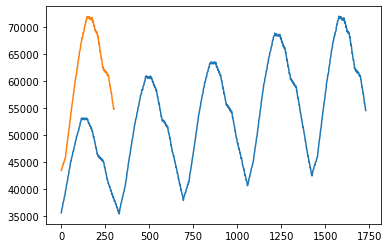

In [178]:
plt.plot(pred,label='pred')
plt.plot(Y_test,label='sales')
plt.show()

In [166]:
print(r2_score(Y_test,pred))

0.9997051862984594


Let us verify stationarity check using adfuller test.

In [19]:
from statsmodels.tsa.stattools import adfuller

In [104]:
def adf_test(data):
    result=adfuller(data)
    print('ADF statistics:{}'.format(result[0]))
    print('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [108]:
adf_test(df_item1['90day_sales'].dropna())

ADF statistics:-3.8169860158913487
p-value:0.002738229438866519
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


from the adfuller test it is known to be stationary. let us plot acf and pacf plots to get p,q values in SARIMAX

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

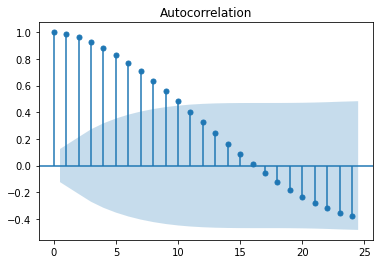

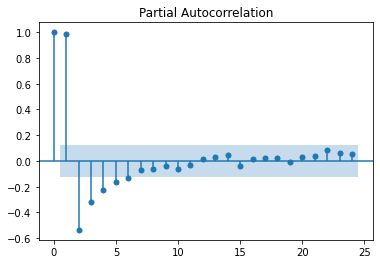

In [23]:
acf=plot_acf(df_item1['90day_sales'].dropna())
pacf=plot_pacf(df_item1['90day_sales'].dropna())

from the graphs we can get p value as 18(AR) and q value as 75(MA)

let us use SARIMAX model as it gives better results for seasonal data

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
len(df_item1.dropna())

249

In [26]:
train_data=df_item1.iloc[:200]
test_data=df_item1.iloc[200:249]#splitting data into train and test data

In [27]:
train_data

,90day_sales
date,
2013-01-01,12847.0
2013-01-08,13375.0
2013-01-15,13891.0
2013-01-22,14356.0
2013-01-29,14866.0
...,...
2016-09-27,20196.0
2016-10-04,19785.0
2016-10-11,19284.0


In [28]:
test_data

,90day_sales
date,
2016-11-01,17968.0
2016-11-08,17501.0
2016-11-15,17110.0
2016-11-22,16742.0
2016-11-29,16390.0
2016-12-06,16398.0
2016-12-13,16658.0
2016-12-20,16954.0
2016-12-27,17171.0


In [82]:
model=SARIMAX(train_data['90day_sales'],order=(6,0,10),seasonal_order=(4,0,6,52))

C:\Users\Jtobss\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  warnings.warn('No frequency information was'
C:\Users\Jtobss\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  warnings.warn('No frequency information was'


In [83]:
model_sarima=model.fit()

C:\Users\Jtobss\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                               
============================================================================================================
Dep. Variable:                                          90day_sales   No. Observations:                  200
Model:             SARIMAX(6, 0, 10)x(4, 0, [1, 2, 3, 4, 5, 6], 52)   Log Likelihood               -1236.246
Date:                                              Mon, 07 Mar 2022   AIC                           2526.491
Time:                                                      12:11:40   BIC                           2615.546
Sample:                                                  01-01-2013   HQIC                          2562.530
                                                       - 10-25-2016                                         
Covariance Type:                                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6558      1.427     -0.460      0.646      -3.452       2.140
ar.L2         -0.1979      0.301     -0.658      0.510      -0.787       0.391
ar.L3          0.2424      0.498      0.487      0.626      -0.734       1.219
ar.L4          0.5153      0.730      0.706      0.480      -0.916       1.946
ar.L5          0.6649      0.275      2.421      0.015       0.127       1.203
ar.L6          0.3972      0.896      0.443      0.658      -1.359       2.153
ma.L1          2.5105      1.428      1.759      0.079      -0.288       5.309
ma.L2          4.1983      2.529      1.660      0.097      -0.759       9.155
ma.L3          5.6921      4.015      1.418      0.156      -2.177      13.561
ma.L4          6.7518      4.925      1.371      0.170      -2.902      16.406
ma.L5          6.9884      5.708      1.224      0.221      -4.200      18.176
ma.L6          6.3598      5.386      1.181      0.238      -4.197      16.917
ma.L7          5.2260      4.741      1.102      0.270      -4.067      14.519
ma.L8          3.5580      3.622      0.982      0.326      -3.541      10.657
ma.L9          1.8915      2.131      0.888      0.375      -2.285       6.068
ma.L10         0.5578      0.943      0.591      0.554      -1.291       2.407
ar.S.L52       0.2194      2.108      0.104      0.917      -3.911       4.350
ar.S.L104      0.0814      1.489      0.055      0.956      -2.837       3.000
ar.S.L156      0.0296      1.019      0.029      0.977      -1.968       2.028
ar.S.L208      0.0263      1.215      0.022      0.983      -2.354       2.407
ma.S.L52       0.2829      2.162      0.131      0.896      -3.955       4.521
ma.S.L104      0.1709      0.918      0.186      0.852      -1.628       1.970
ma.S.L156      0.0835      1.648      0.051      0.960      -3.146       3.313
ma.S.L208      0.0207      1.255      0.017      0.987      -2.440       2.481
ma.S.L260      0.0106      1.170      0.009      0.993      -2.282       2.303
ma.S.L312      0.0105      1.242      0.008      0.993      -2.423       2.444
sigma2      1.843e+04   1.04e+04      1.774      0.076   -1936.735    3.88e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 3.07
Prob(Q):                              0.66   Prob(JB):                         0.22
Heteroskedasticity (H):               1.51   Skew:                            -0.30
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).


In [85]:
pred_sarima=model_sarima.predict(start=test_data.index[0],end=test_data.index[-1])#prediction

In [86]:
test_data['pred_sarima']=pred_sarima

In [87]:
test_data

,90day_sales,pred_sarima
date,,
2016-11-01,17968.0,18103.696486
2016-11-08,17501.0,17855.993550
2016-11-15,17110.0,17578.478920
2016-11-22,16742.0,17357.888162
2016-11-29,16390.0,17132.381774
2016-12-06,16398.0,17277.390774
2016-12-13,16658.0,17443.769708
2016-12-20,16954.0,17615.947876
2016-12-27,17171.0,17798.130099


<AxesSubplot:xlabel='date'>

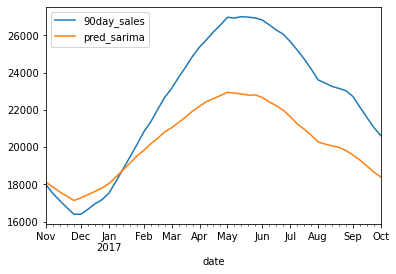

In [88]:
test_data.plot()

In [36]:
len(df_item1.dropna())

249

In [69]:
pred_sarima_1=model_sarima.predict(start=df_item1.dropna().index[0],end=df_item1.dropna().index[-1])

In [70]:
df_item1['pred_sarima_1']=pred_sarima_1

<AxesSubplot:xlabel='date'>

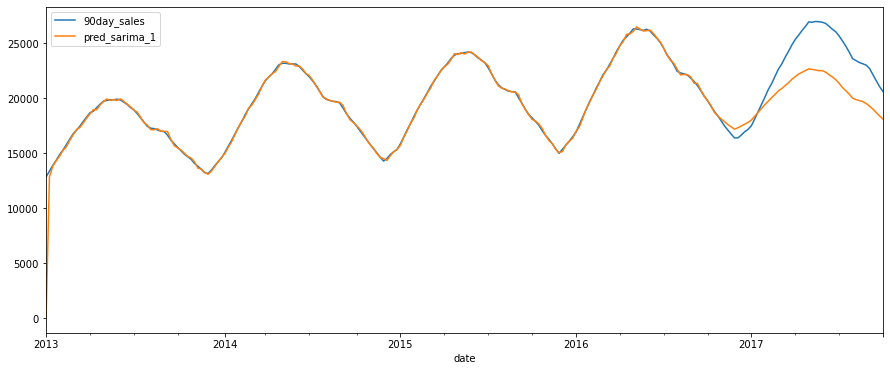

In [71]:
df_item1.dropna().plot(figsize=(15,6))

In [72]:
df_item1

,90day_sales,pred_sarima_1
date,,
2013-01-01,12847.0,0.000000
2013-01-08,13375.0,12843.249803
2013-01-15,13891.0,13820.450181
2013-01-22,14356.0,14317.221226
2013-01-29,14866.0,14720.220578
...,...,...
2017-11-28,NaN,NaN
2017-12-05,NaN,NaN
2017-12-12,NaN,NaN


In [41]:
from sklearn.metrics import mean_squared_error,r2_score

In [95]:
mse=mean_squared_error(test_data.dropna()['90day_sales'],test_data.dropna()['pred_sarima'])

In [96]:
print(mse)

7858010.488828917


In [89]:
r2=r2_score(test_data.dropna()['90day_sales'],test_data.dropna()['pred_sarima'])

In [90]:
print('The r2 score of item1 forecasting is',r2)

The r2 score of item1 forecasting is 0.3670744913729689


In [46]:
df_item2=d2[d2['item']==2]
df_item2['90day_sales']=df_item2['sales'].rolling(90).sum()
df_item2=df_item2.shift(-89)
df_item2.drop(['item','sales'],axis=1,inplace=True)
df_item2

,90day_sales
date,
2013-01-01,34650.0
2013-01-02,34724.0
2013-01-03,34917.0
2013-01-04,35113.0
2013-01-05,35248.0
...,...
2017-12-27,NaN
2017-12-28,NaN
2017-12-29,NaN


In [47]:
adf_test(df_item2['90day_sales'].dropna())

ADF statistics:-5.050203669544645
p-value:1.763834130531601e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


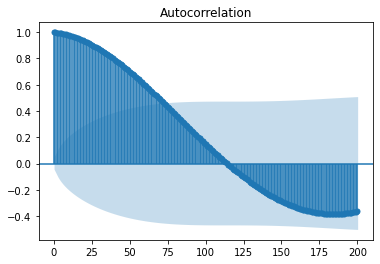

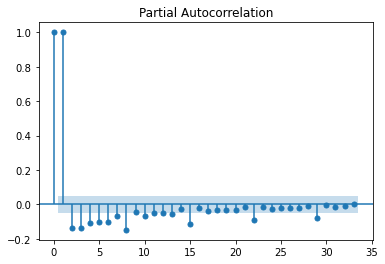

In [48]:
acf=plot_acf(df_item2['90day_sales'].dropna(),lags=200)
pacf=plot_pacf(df_item2['90day_sales'].dropna())

from the above graphs, p=15,q=70

In [49]:
train_data_2=df_item2.iloc[:1500]
test_data_2=df_item2.iloc[1500:1737]#splitting data into train and test data

In [50]:
model2=SARIMAX(train_data_2['90day_sales'],order=(15,0,70),seasonal_order=(0,0,0,0))

C:\Users\Jtobss\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Jtobss\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [51]:
model_sarima2=model2.fit()

KeyboardInterrupt: 

In [ ]:
model_sarima2.summary()

In [ ]:
pred_sarima=model_sarima2.predict(start=test_data_2.index[0],end=test_data_2.index[-1])#prediction
test_data_2['pred_sarima']=pred_sarima

In [ ]:
test_data_2

In [ ]:
test_data_2.plot()

In [ ]:
pred_sarima_1=model_sarima2.predict(start=df_item2.dropna().index[0],end=df_item2.dropna().index[-1])
df_item2['pred_sarima_1']=pred_sarima_1
df_item2.dropna().plot(figsize=(15,6))

In [ ]:
print('mse is',mean_squared_error(df_item2.dropna()['90day_sales'],df_item2.dropna()['pred_sarima_1']))
print('The r2_score of item_2 forecast is',r2_score(df_item2.dropna()['90day_sales'],df_item2.dropna()['pred_sarima_1']))